In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\Banks.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [12]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
 df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Exited', ylabel='count'>

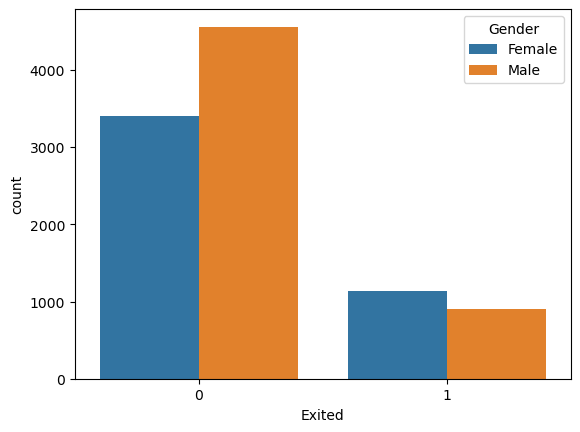

In [24]:
sns.countplot(df['Exited'],hue = df['Gender'])

<AxesSubplot:xlabel='Exited', ylabel='count'>

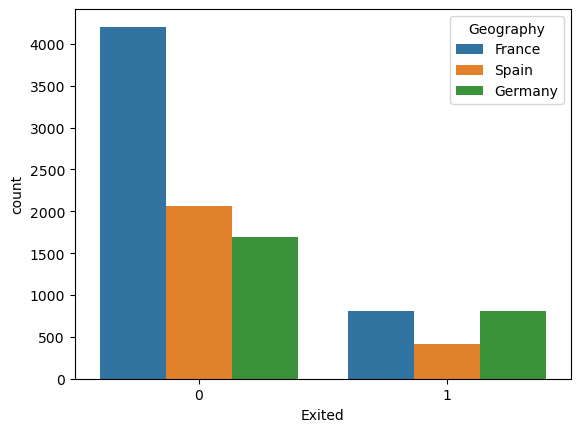

In [25]:
sns.countplot(df['Exited'],hue = df['Geography'])

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

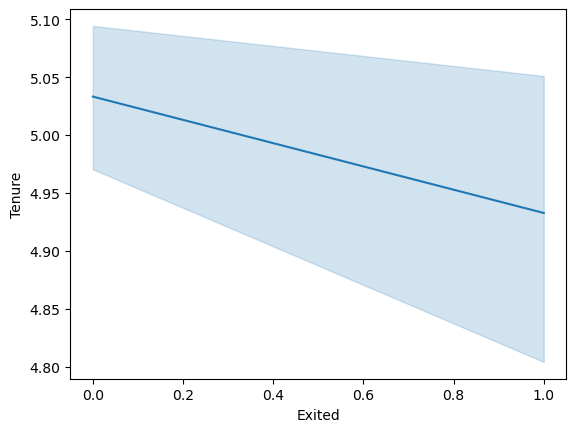

In [26]:
sns.lineplot('Exited','Tenure',data = df)

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

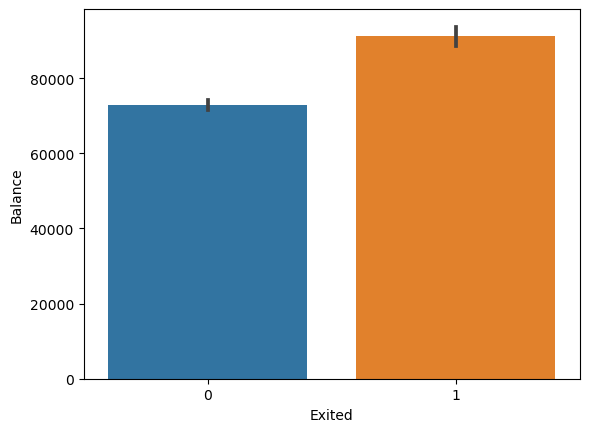

In [31]:
sns.barplot('Exited','Balance',data = df)

In [32]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
df['Gender']= le.fit_transform(df['Gender'])
df['Geography']= le.fit_transform(df['Geography'])

In [36]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [38]:
df['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

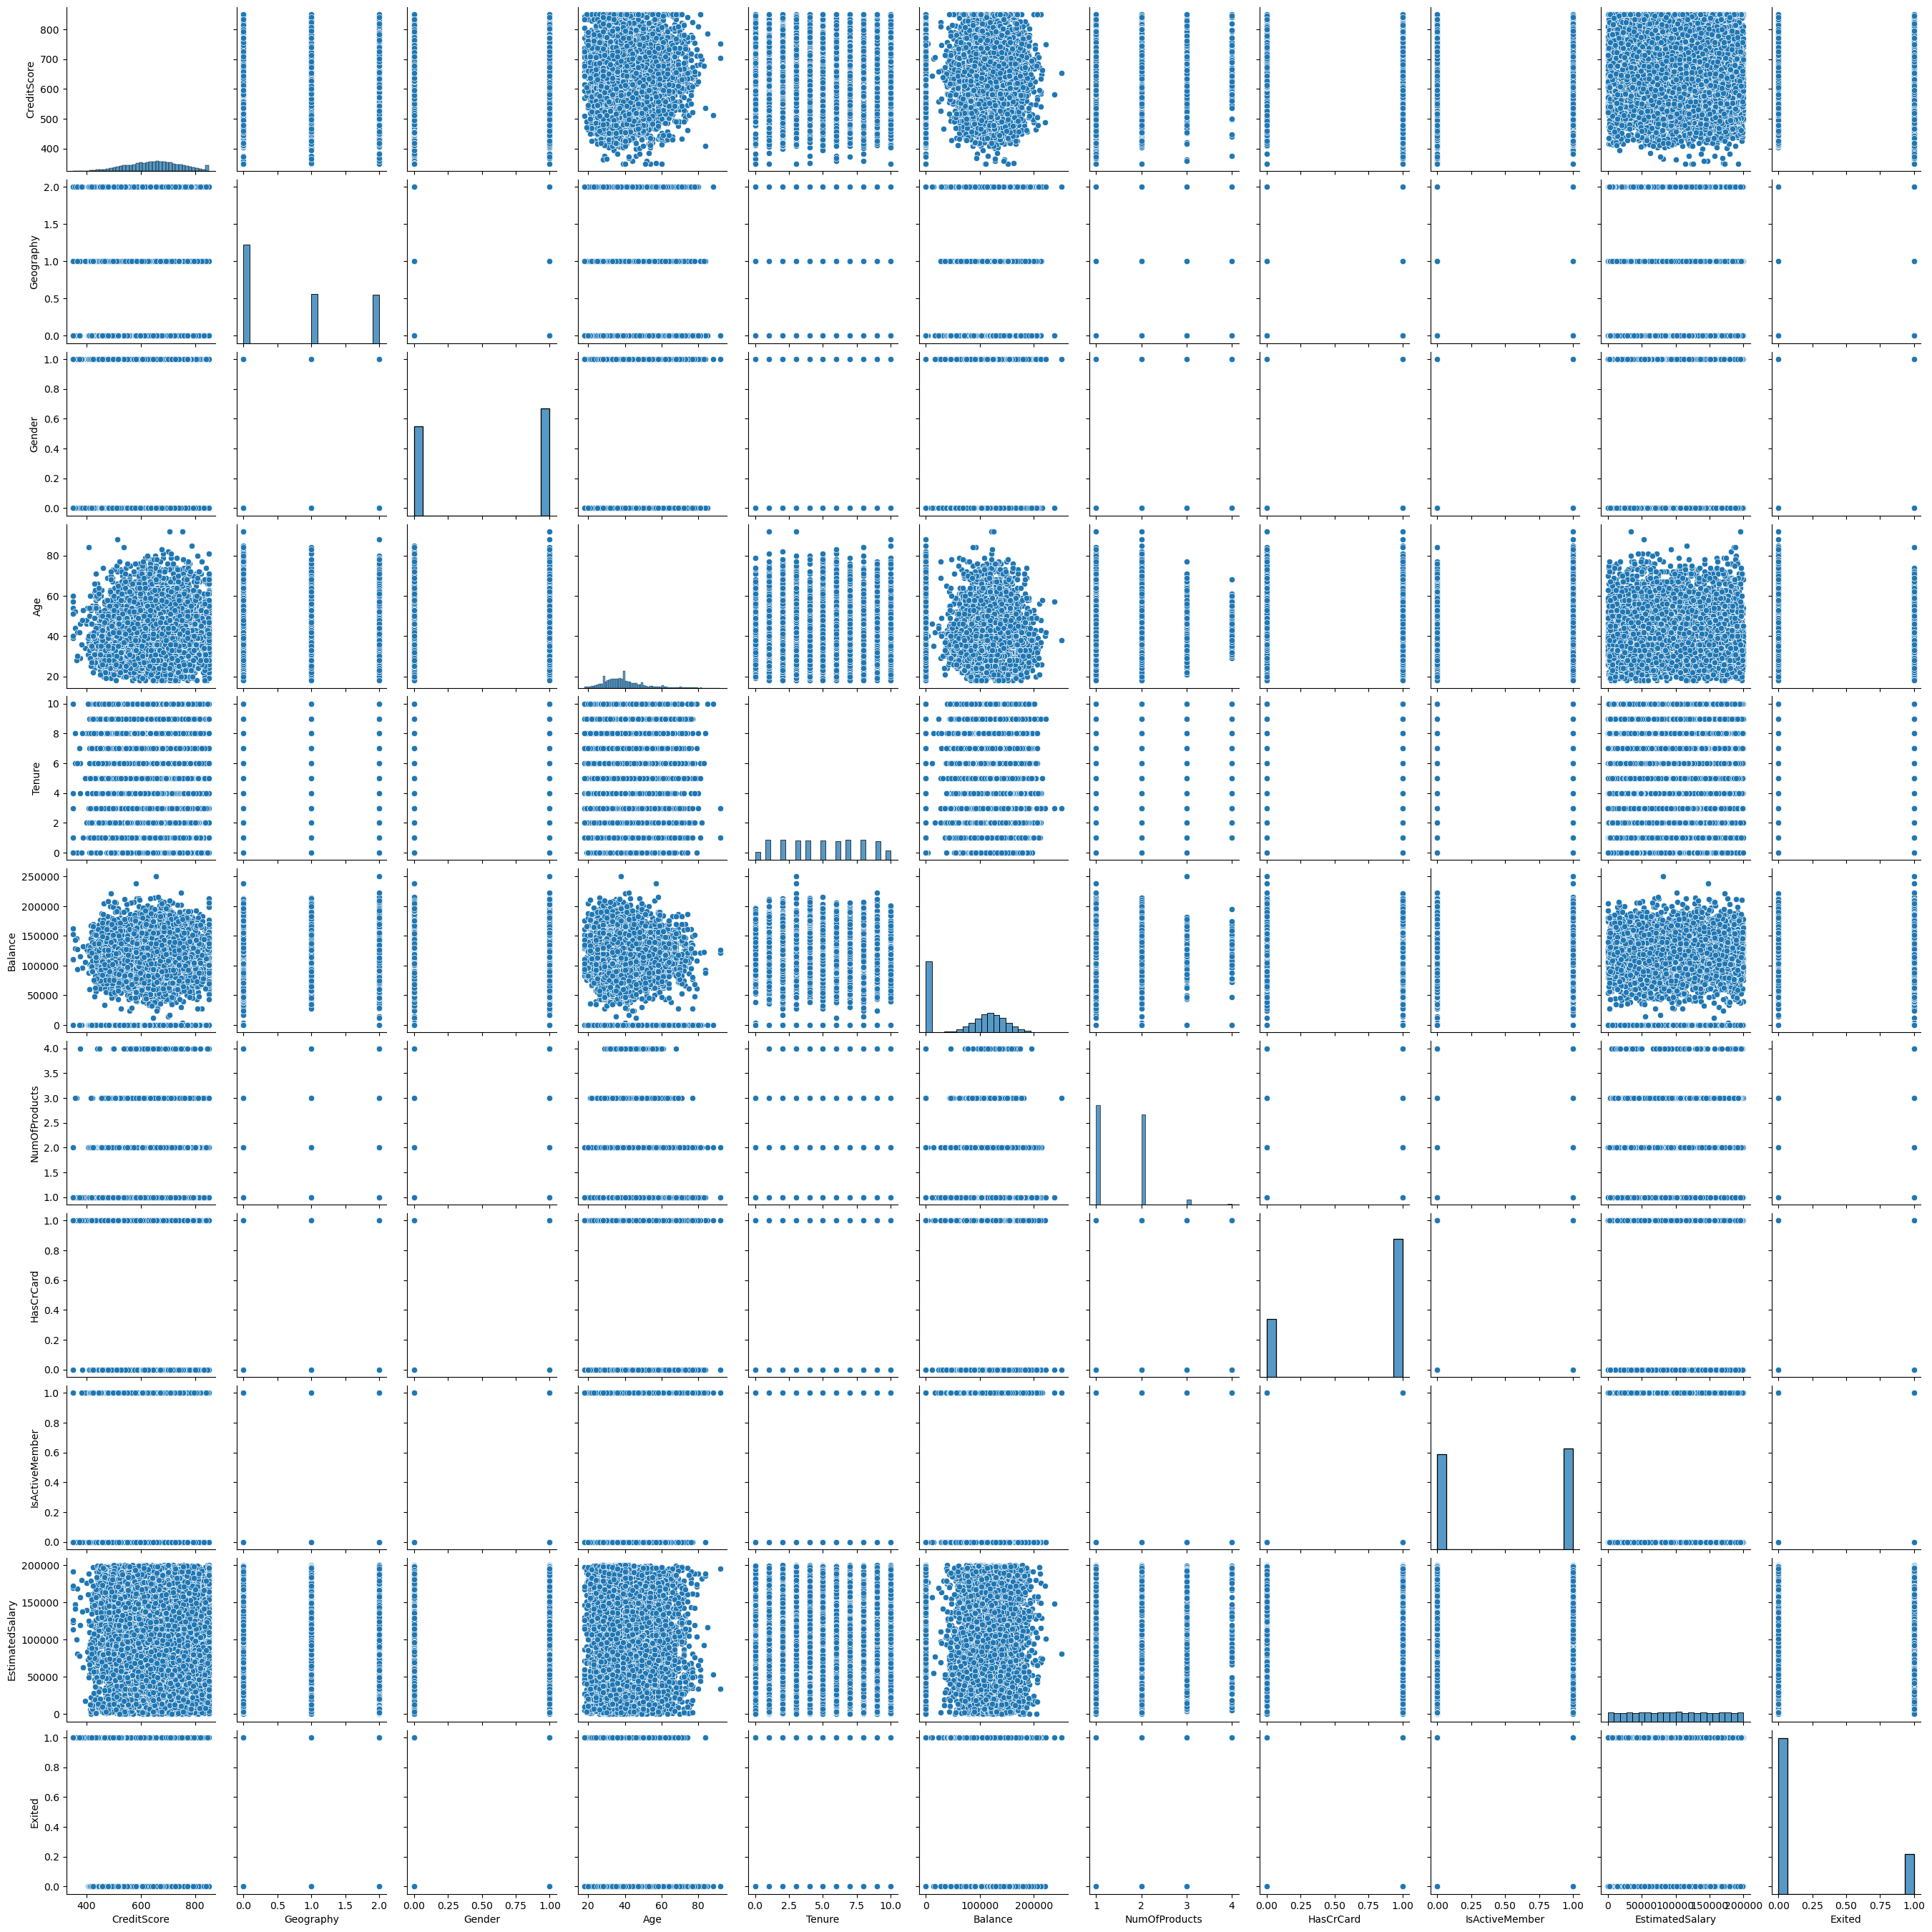

In [39]:
sns.pairplot(data = df)

In [40]:
y = df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [41]:
x = df.drop('Exited',axis = 1)

In [42]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)


In [44]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8049,652,0,0,31,3,103696.97,3,0,0,155221.05
8160,790,1,0,25,5,152885.77,1,1,0,58214.79
786,688,0,1,26,1,0.00,2,1,1,104435.94
5009,656,2,1,33,4,0.00,2,1,0,116706.00
6879,665,0,1,25,7,90920.75,1,0,1,112256.57
...,...,...,...,...,...,...,...,...,...,...
801,671,1,0,44,0,84745.03,2,0,1,34673.98
2724,453,1,0,38,8,120623.21,1,1,0,129697.99
6387,513,0,0,43,9,0.00,2,1,0,152499.80
2751,704,0,1,42,8,129735.30,2,1,1,179565.57


In [45]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6876,591,0,0,42,10,0.00,2,0,0,171099.22
4474,767,0,1,36,3,0.00,1,0,0,65147.27
7434,638,2,1,35,1,0.00,2,1,0,165370.66
2231,746,0,1,35,2,172274.01,1,1,0,22374.97
3848,560,1,1,41,4,152532.30,1,0,0,10779.69
...,...,...,...,...,...,...,...,...,...,...
2789,705,2,1,44,0,184552.12,1,1,0,68860.30
7532,760,2,0,33,1,118114.28,2,0,1,156660.21
7957,850,1,0,34,3,129668.43,2,1,1,88743.99
5863,748,0,1,40,3,95297.11,1,0,0,171515.84


In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
x_train

array([[ 0.00287484, -0.89728961, -1.09918237, ..., -1.53798069,
        -1.02517391,  0.95884351],
       [ 1.42995439,  0.30967182, -1.09918237, ...,  0.65020322,
        -1.02517391, -0.72652921],
       [ 0.37515646, -0.89728961,  0.90976714, ...,  0.65020322,
         0.97544426,  0.07651036],
       ...,
       [-1.43454587, -0.89728961, -1.09918237, ...,  0.65020322,
        -1.02517391,  0.91156491],
       [ 0.54061496, -0.89728961,  0.90976714, ...,  0.65020322,
         0.97544426,  1.38180168],
       [ 1.36790746,  1.51663324, -1.09918237, ...,  0.65020322,
        -1.02517391, -1.62658595]])

In [48]:
x_test

array([[-0.62793569, -0.89728961, -1.09918237, ..., -1.53798069,
        -1.02517391,  1.23470854],
       [ 1.1921078 , -0.89728961,  0.90976714, ..., -1.53798069,
        -1.02517391, -0.60608531],
       [-0.14190135,  1.51663324,  0.90976714, ...,  0.65020322,
        -1.02517391,  1.13518136],
       ...,
       [ 2.05042376,  0.30967182, -1.09918237, ...,  0.65020322,
         0.97544426, -0.19611931],
       [ 0.99562583, -0.89728961,  0.90976714, ..., -1.53798069,
        -1.02517391,  1.24194683],
       [-0.0591721 , -0.89728961, -1.09918237, ...,  0.65020322,
         0.97544426, -0.74352692]])

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [51]:
model = Sequential()

In [52]:
model.add(Dense(units = 6,activation = 'relu',input_dim = 10 ))

In [53]:
model.add(Dense(units = 4,activation = 'relu'))


In [54]:
model.add(Dense(units = 2,activation = 'relu'))

In [55]:
model.add(Dense(units = 1,activation = 'sigmoid'))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 66        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer ='adam',loss ='binary_crossentropy',metrics = ['accuracy'])

In [59]:
model.fit(x_train,y_train,validation_split = 0.33,batch_size = 10,epochs = 100)

Epoch 1/100
469/469 [==============================] - 2s 2ms/step - loss: 0.5893 - accuracy: 0.7424 - val_loss: 0.5201 - val_accuracy: 0.7958
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4877 - accuracy: 0.7955 - val_loss: 0.4742 - val_accuracy: 0.7975
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4526 - accuracy: 0.7942 - val_loss: 0.4446 - val_accuracy: 0.8018
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4337 - accuracy: 0.8012 - val_loss: 0.4312 - val_accuracy: 0.8053
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4232 - accuracy: 0.8042 - val_loss: 0.4204 - val_accuracy: 0.8152
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4143 - accuracy: 0.8155 - val_loss: 0.4121 - val_accuracy: 0.8209
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4053 - accuracy: 0.8221 - val_loss: 0.4019 - val_accuracy: 0.8282

Epoch 58/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3423 - accuracy: 0.8586 - val_loss: 0.3487 - val_accuracy: 0.8594
Epoch 59/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8588 - val_loss: 0.3463 - val_accuracy: 0.8602
Epoch 60/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8556 - val_loss: 0.3453 - val_accuracy: 0.8598
Epoch 61/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8567 - val_loss: 0.3474 - val_accuracy: 0.8624
Epoch 62/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8588 - val_loss: 0.3508 - val_accuracy: 0.8563
Epoch 63/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8571 - val_loss: 0.3467 - val_accuracy: 0.8611
Epoch 64/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8571 - val_loss: 0.3461 - val_accuracy:

In [60]:
pred = model.predict(x_test)

94/94 [==============================] - 0s 894us/step


In [62]:
pred = pred>0.5

In [63]:
pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [66]:
cm = confusion_matrix(y_test,pred)

<AxesSubplot:>

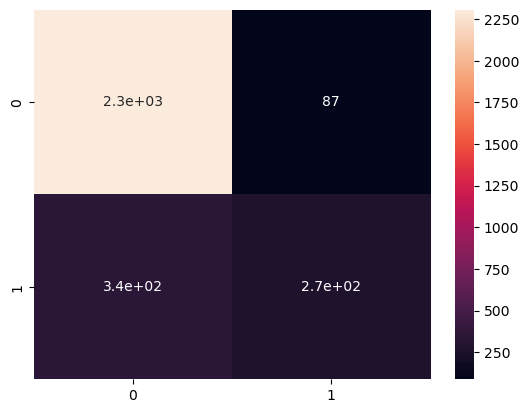

In [67]:
sns.heatmap(cm,annot = True)

In [68]:
print(accuracy_score(y_test,pred))

0.8586666666666667


In [70]:
import pickle
with open ("Rate Of Customers Of Banks",'wb') as f:
    pickle.dump(model,f)